In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurar matplotlib para gráficos en línea
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("ANÁLISIS EXPLORATORIO - DEWATERING SOLUTIONS")
print("=" * 50)

ANÁLISIS EXPLORATORIO - DEWATERING SOLUTIONS


In [3]:
df = pd.read_csv('../data/dewatering_realistic_supplier_dataset.csv')

print(f"INFORMACIÓN DEL DATASET")
print(f"Filas: {df.shape[0]}")
print(f"Columnas: {df.shape[1]}")
print(f"Período: {df['date'].min()} a {df['date'].max()}")

print(f"\nCOLUMNAS DISPONIBLES:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

INFORMACIÓN DEL DATASET
Filas: 1211
Columnas: 25
Período: 2022-01-01 a 2024-12-31

COLUMNAS DISPONIBLES:
 1. transaction_id
 2. date
 3. supplier_id
 4. supplier_name
 5. country
 6. payment_terms_days
 7. delivery_days
 8. price_usd
 9. quality_rating
10. incoterms
11. shipping_included
12. express_available
13. order_urgency
14. budget_available
15. product_name
16. product_type
17. quantity_needed
18. total_estimated_cost
19. within_budget
20. quality_acceptable
21. value_score
22. month
23. quarter
24. selected
25. selection_reason


In [4]:
print("\nANÁLISIS POR ESPECIALIZACIÓN DE NEGOCIO")
print("=" * 50)

# Separar por tipo de negocio
sensor_types = ['pressure_sensor_analog', 'pressure_sensor_digital', 
                'temperature_sensor_bimetal', 'sensor_inductivo', 'transmisor_presion']

filtration_df = df[~df['product_type'].isin(sensor_types)]
sensor_df = df[df['product_type'].isin(sensor_types)]

print(f"PRODUCTOS DE FILTRACIÓN: {len(filtration_df)} transacciones ({len(filtration_df)/len(df)*100:.1f}%)")
print("Proveedores especializados:")
filt_providers = filtration_df.groupby(['supplier_name', 'quality_rating']).size().reset_index()
for _, row in filt_providers.iterrows():
    print(f"  • {row['supplier_name']}: {row['quality_rating']}/5.0 - {row[0]} transacciones")

print(f"\nPRODUCTOS DE SENSORES: {len(sensor_df)} transacciones ({len(sensor_df)/len(df)*100:.1f}%)")
print("Proveedores especializados:")
sens_providers = sensor_df.groupby(['supplier_name', 'quality_rating']).size().reset_index()
for _, row in sens_providers.iterrows():
    print(f"  • {row['supplier_name']}: {row['quality_rating']}/5.0 - {row[0]} transacciones")



ANÁLISIS POR ESPECIALIZACIÓN DE NEGOCIO
PRODUCTOS DE FILTRACIÓN: 911 transacciones (75.2%)
Proveedores especializados:
  • AIR SLAID TECIDOS TÉCNICOS LTDA: 4.0/5.0 - 266 transacciones
  • GWI GROUP LIMITED: 3.5/5.0 - 191 transacciones
  • TESTORI LATAM SpA: 5.0/5.0 - 283 transacciones
  • Xiamen Borida Products Co., Ltd: 3.0/5.0 - 171 transacciones

PRODUCTOS DE SENSORES: 300 transacciones (24.8%)
Proveedores especializados:
  • Autonics Perú: 4.8/5.0 - 123 transacciones
  • Ritherm: 4.5/5.0 - 177 transacciones



ANÁLISIS POR ESPECIALIZACIÓN DE NEGOCIO
PRODUCTOS DE FILTRACIÓN: 911 transacciones (75.2%)
Proveedores especializados:
  • AIR SLAID TECIDOS TÉCNICOS LTDA: 4.0/5.0 - 266 transacciones
  • GWI GROUP LIMITED: 3.5/5.0 - 191 transacciones
  • TESTORI LATAM SpA: 5.0/5.0 - 283 transacciones
  • Xiamen Borida Products Co., Ltd: 3.0/5.0 - 171 transacciones

PRODUCTOS DE SENSORES: 300 transacciones (24.8%)
Proveedores especializados:
  • Autonics Perú: 4.8/5.0 - 123 transacciones
  • Ritherm: 4.5/5.0 - 177 transacciones


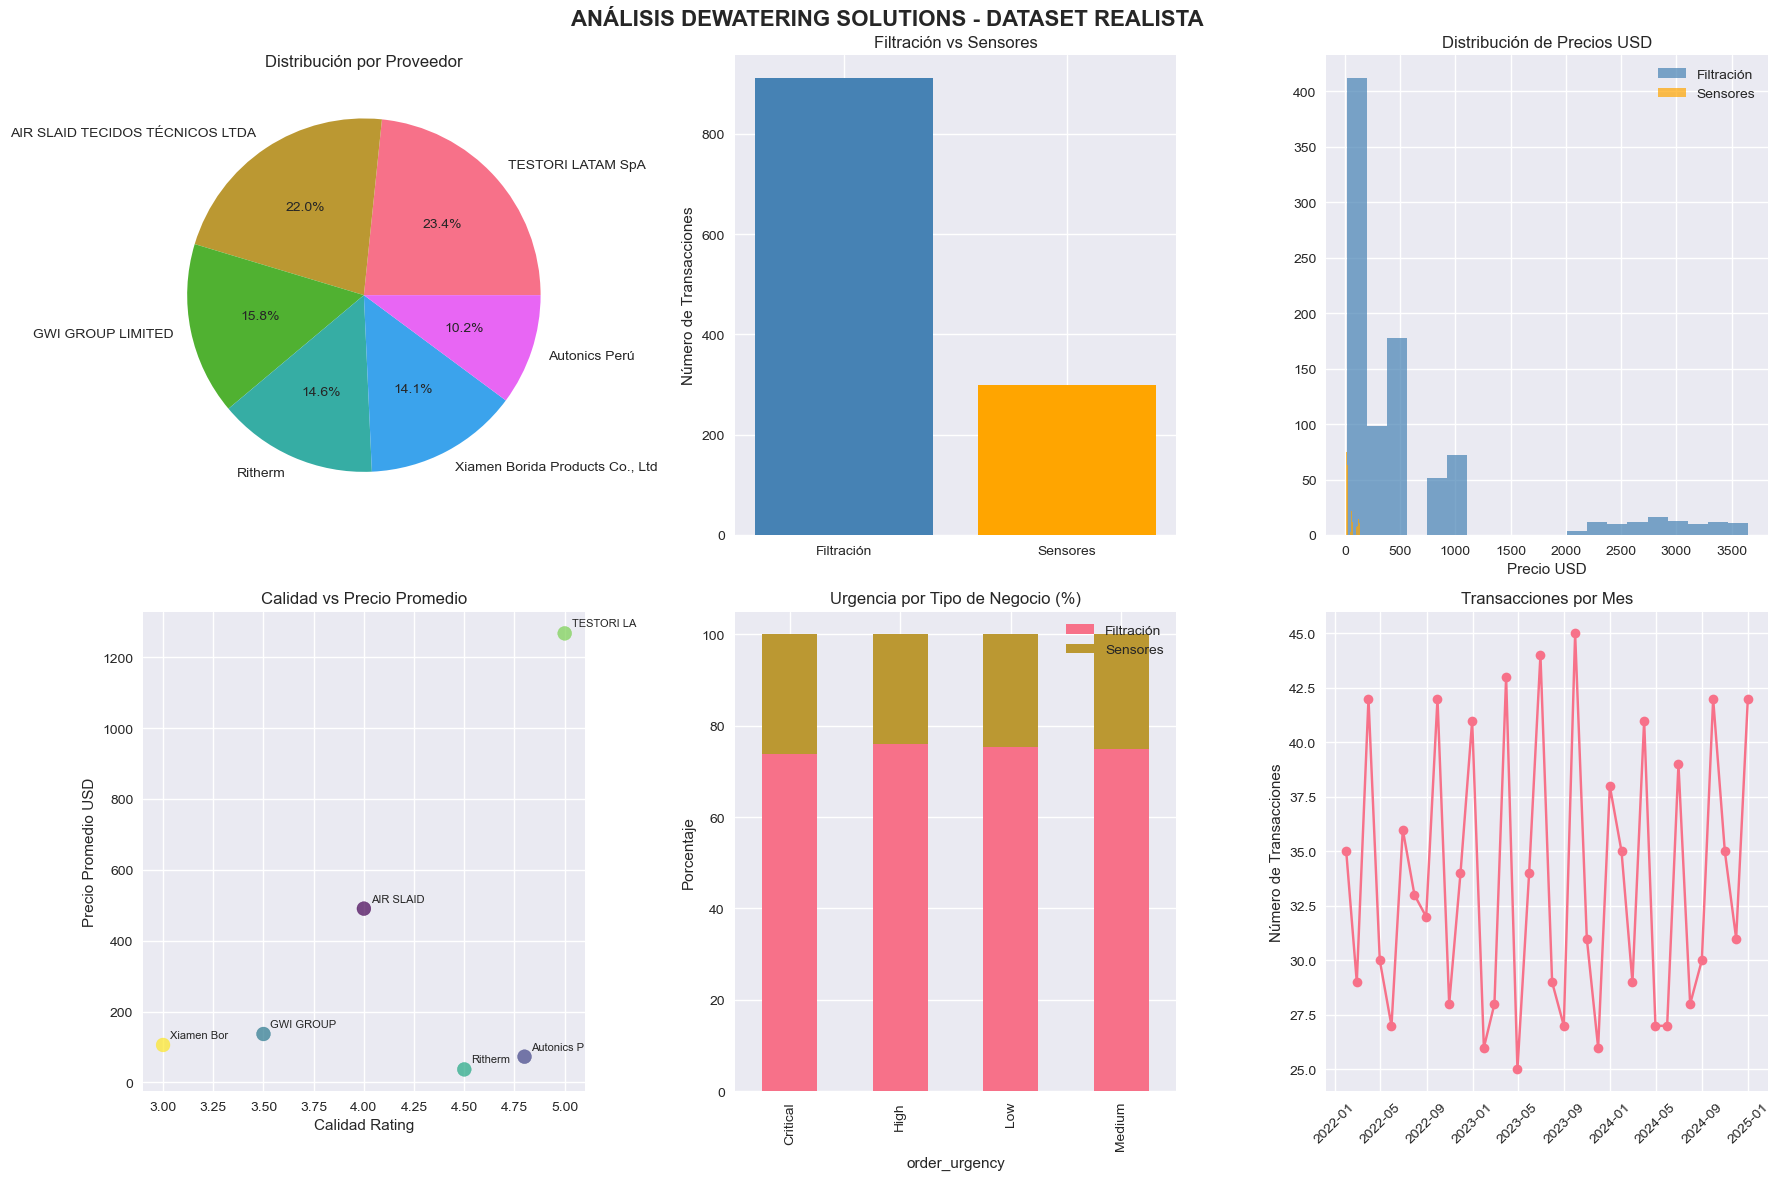

In [5]:
print("\nANÁLISIS POR ESPECIALIZACIÓN DE NEGOCIO")
print("=" * 50)

# Separar por tipo de negocio
sensor_types = ['pressure_sensor_analog', 'pressure_sensor_digital', 
                'temperature_sensor_bimetal', 'sensor_inductivo', 'transmisor_presion']

filtration_df = df[~df['product_type'].isin(sensor_types)]
sensor_df = df[df['product_type'].isin(sensor_types)]

print(f"PRODUCTOS DE FILTRACIÓN: {len(filtration_df)} transacciones ({len(filtration_df)/len(df)*100:.1f}%)")
print("Proveedores especializados:")
filt_providers = filtration_df.groupby(['supplier_name', 'quality_rating']).size().reset_index()
for _, row in filt_providers.iterrows():
    print(f"  • {row['supplier_name']}: {row['quality_rating']}/5.0 - {row[0]} transacciones")

print(f"\nPRODUCTOS DE SENSORES: {len(sensor_df)} transacciones ({len(sensor_df)/len(df)*100:.1f}%)")
print("Proveedores especializados:")
sens_providers = sensor_df.groupby(['supplier_name', 'quality_rating']).size().reset_index()
for _, row in sens_providers.iterrows():
    print(f"  • {row['supplier_name']}: {row['quality_rating']}/5.0 - {row[0]} transacciones")

# CELDA 4: Visualizaciones del nuevo dataset
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('ANÁLISIS DEWATERING SOLUTIONS - DATASET REALISTA', fontsize=16, fontweight='bold')

# 1. Distribución por proveedor
supplier_counts = df['supplier_name'].value_counts()
axes[0,0].pie(supplier_counts.values, labels=supplier_counts.index, autopct='%1.1f%%')
axes[0,0].set_title('Distribución por Proveedor')

# 2. Comparación Filtración vs Sensores
business_type = ['Filtración', 'Sensores'] 
business_counts = [len(filtration_df), len(sensor_df)]
axes[0,1].bar(business_type, business_counts, color=['steelblue', 'orange'])
axes[0,1].set_title('Filtración vs Sensores')
axes[0,1].set_ylabel('Número de Transacciones')

# 3. Distribución de precios por segmento
axes[0,2].hist(filtration_df['price_usd'], bins=20, alpha=0.7, label='Filtración', color='steelblue')
axes[0,2].hist(sensor_df['price_usd'], bins=20, alpha=0.7, label='Sensores', color='orange')
axes[0,2].set_title('Distribución de Precios USD')
axes[0,2].set_xlabel('Precio USD')
axes[0,2].legend()

# 4. Calidad vs Precio promedio
quality_price = df.groupby('supplier_name').agg({
    'quality_rating': 'first',
    'price_usd': 'mean'
}).reset_index()

axes[1,0].scatter(quality_price['quality_rating'], quality_price['price_usd'], 
                 s=100, alpha=0.7, c=range(len(quality_price)), cmap='viridis')
for i, row in quality_price.iterrows():
    axes[1,0].annotate(row['supplier_name'][:10], 
                      (row['quality_rating'], row['price_usd']),
                      xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[1,0].set_xlabel('Calidad Rating')
axes[1,0].set_ylabel('Precio Promedio USD')
axes[1,0].set_title('Calidad vs Precio Promedio')

# 5. Urgencia por tipo de producto
urgency_business = pd.crosstab(df['order_urgency'], 
                              df['product_type'].isin(sensor_types), 
                              normalize='index') * 100
urgency_business.columns = ['Filtración', 'Sensores']
urgency_business.plot(kind='bar', ax=axes[1,1], stacked=True)
axes[1,1].set_title('Urgencia por Tipo de Negocio (%)')
axes[1,1].set_ylabel('Porcentaje')
axes[1,1].legend()

# 6. Distribución temporal
df['date'] = pd.to_datetime(df['date'])
monthly_counts = df.set_index('date').resample('M').size()
axes[1,2].plot(monthly_counts.index, monthly_counts.values, marker='o')
axes[1,2].set_title('Transacciones por Mes')
axes[1,2].set_ylabel('Número de Transacciones')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [6]:
print("\nANÁLISIS FINANCIERO DETALLADO")
print("=" * 50)

# Análisis por segmento de negocio
print("FILTRACIÓN (Negocio Principal):")
filt_stats = filtration_df.groupby('supplier_name').agg({
    'total_estimated_cost': ['count', 'mean', 'sum'],
    'quality_rating': 'first',
    'delivery_days': 'first'
}).round(2)
print(filt_stats)

print("\nSENSORES (Negocio Complementario):")
sens_stats = sensor_df.groupby('supplier_name').agg({
    'total_estimated_cost': ['count', 'mean', 'sum'],
    'quality_rating': 'first', 
    'delivery_days': 'first'
}).round(2)
print(sens_stats)

# Razones de selección por segmento
print(f"\nRAZONES DE SELECCIÓN - FILTRACIÓN:")
filt_reasons = filtration_df['selection_reason'].value_counts()
for reason, count in filt_reasons.items():
    percentage = (count / len(filtration_df)) * 100
    print(f"  {reason}: {count} ({percentage:.1f}%)")

print(f"\nRAZONES DE SELECCIÓN - SENSORES:")
sens_reasons = sensor_df['selection_reason'].value_counts()
for reason, count in sens_reasons.items():
    percentage = (count / len(sensor_df)) * 100
    print(f"  {reason}: {count} ({percentage:.1f}%)")

print(f"\nAnálisis exploratorio completado!")
print(f"Dataset listo para entrenamiento del modelo")


ANÁLISIS FINANCIERO DETALLADO
FILTRACIÓN (Negocio Principal):
                                total_estimated_cost                       \
                                               count     mean         sum   
supplier_name                                                               
AIR SLAID TECIDOS TÉCNICOS LTDA                  266  3372.73   897147.25   
GWI GROUP LIMITED                                191   780.25   149028.09   
TESTORI LATAM SpA                                283  9025.53  2554224.54   
Xiamen Borida Products Co., Ltd                  171  1995.44   341220.70   

                                quality_rating delivery_days  
                                         first         first  
supplier_name                                                 
AIR SLAID TECIDOS TÉCNICOS LTDA            4.0            30  
GWI GROUP LIMITED                          3.5            28  
TESTORI LATAM SpA                          5.0            10  
Xiamen Borida Produ